<a href="https://colab.research.google.com/github/BUN-Nakai/MachineLearningAlgorithm/blob/main/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 多項式回帰

## ライブラリのインポート

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## データセットのインポート

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
# Positionは多重共線性より不要（Levelがあればよいため）
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [4]:
# こうしてしまうと2DArrayにならないので、上記の記載が必要となる
X_2 = dataset.iloc[:,1].values
X_2

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [5]:
# yは2DArrayの必要がない
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

## データセットを使った線形回帰モデルの訓練

In [6]:
from sklearn.linear_model import LinearRegression as LR
lr = LR()
lr.fit(X,y)

LinearRegression()

## データセットを使った多項式回帰モデルの訓練

In [8]:
from sklearn.preprocessing import PolynomialFeatures
# degree=は次元を指定する、今回は2次元
poly_reg = PolynomialFeatures(degree=2)
# 多項式回帰モデルの為にデータを変換
X_poly = poly_reg.fit_transform(X) 
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [9]:
lr2 = LR()
lr2.fit(X_poly, y)

LinearRegression()

## 結果の可視化（線形回帰）

Text(0.5, 0, 'position')

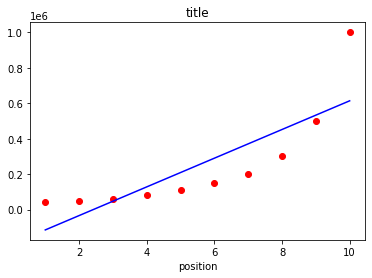

In [12]:
plt.scatter(X, y, color="red")
# 線形回帰
plt.plot(X, lr.predict(X), color="blue")
# タイトル
plt.title("title")
# Xラベル
plt.xlabel("position")

## 結果の可視化（多項式回帰）

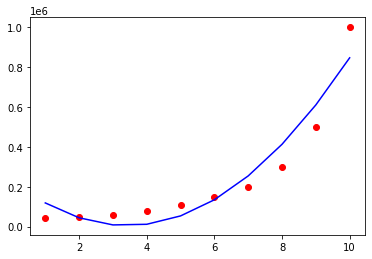

In [13]:
plt.scatter(X, y, color="red")
# 多項式回帰
plt.plot(X, lr2.predict(X_poly), color="blue")

## 結果の可視化（多項式回帰、より滑らかなカーブ）

In [15]:
# 0.1刻みで最小値から最大値まで
X_grid = np.arange(min(X), max(X), 0.1)
# 中身は1次元配列（ベクトル）
X_grid

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
       7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [16]:
# ベクトルから2DArrayに変換
X_grid = X_grid.reshape(len(X_grid), 1)
X_grid

array([[1. ],
       [1.1],
       [1.2],
       [1.3],
       [1.4],
       [1.5],
       [1.6],
       [1.7],
       [1.8],
       [1.9],
       [2. ],
       [2.1],
       [2.2],
       [2.3],
       [2.4],
       [2.5],
       [2.6],
       [2.7],
       [2.8],
       [2.9],
       [3. ],
       [3.1],
       [3.2],
       [3.3],
       [3.4],
       [3.5],
       [3.6],
       [3.7],
       [3.8],
       [3.9],
       [4. ],
       [4.1],
       [4.2],
       [4.3],
       [4.4],
       [4.5],
       [4.6],
       [4.7],
       [4.8],
       [4.9],
       [5. ],
       [5.1],
       [5.2],
       [5.3],
       [5.4],
       [5.5],
       [5.6],
       [5.7],
       [5.8],
       [5.9],
       [6. ],
       [6.1],
       [6.2],
       [6.3],
       [6.4],
       [6.5],
       [6.6],
       [6.7],
       [6.8],
       [6.9],
       [7. ],
       [7.1],
       [7.2],
       [7.3],
       [7.4],
       [7.5],
       [7.6],
       [7.7],
       [7.8],
       [7.9],
       [8. ],
      

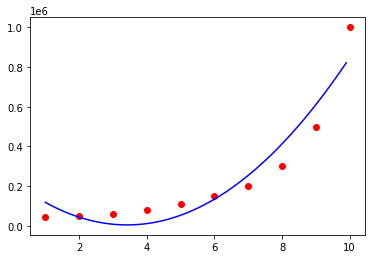

In [17]:
# 散布図  
plt.scatter(X, y, color="red")
# 線グラフ
# yは、細かくしたXに合わせて再度作成しなおしたモデルで描画する
plt.plot(X_grid, lr2.predict(poly_reg.fit_transform(X_grid)), color="blue")

## 線形回帰モデルによる予測




In [18]:
# Level6.5あたりの年収
lr.predict([[6.5]])

array([330378.78787879])

## 多項式回帰モデルによる予測

In [19]:
# Level6.5あたりの年収
lr2.predict(poly_reg.fit_transform([[6.5]]))

array([189498.10606061])